In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt



In [2]:
# 1. Convex hull 
# 2. Try to find a separating line 
# 3. Remove template line? (If canny filter does find a horixontal line)

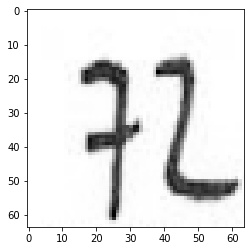

In [3]:
# Load the image and convert to grayscale 
image = cv2.imread('testImages/multiDigitSample4.jpg')

# Grayscale the image
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Invert colors, so it's conform with MNIST 
#image = 1 - image

# Resize the image 
image = cv2.resize(image, (64,64))

# Normalize the image
#image = image.astype('float32')
#image /= 255

# Plot the input image 
plt.imshow(image, cmap='gray')



In [4]:
# Find convex hull

edges= cv2.Canny(image, 100,200)
contours, hierarchy= cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

#thresh = 200
#cv2.threshold(image, thresh, 255, cv2.THRESH_BINARY)
#contours, hierarchy = cv2.findContours(image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

singleDigitImageList = []
for contour in contours:
    
    # Check validity of contour
    # TODO!
    
    # Draw the contours
    #hull= cv2.convexHull(contour)
    #cv2.drawContours(image, [hull],0,(0,255,0),2)
    
    # Extract min and max points on x axis in order to separate the contours 
    xList = []
    yList = []
    for point in contour:
        # Extract x and y points from contour and store them in a list 
        xList.append(point[0][0])
        yList.append(point[0][1])
    
    # Extract min and max values   
    xMin = min(xList)
    xMax = max(xList)
    yMin = min(yList)
    yMax = max(yList)

    # Create rectangle mask based on contour extremas and mask out the digit
    #cv2.rectangle(image, (xMin,yMin), (xMax,yMax), (0,0,0),1)
    
    # Create dedicated image for single digit ROI
    padding = 10
    width = xMax - xMin + 2*padding 
    length = yMax - yMin + 2*padding
    blankImage = np.zeros([length,width], dtype=np.uint8)
    blankImage[:] = 255
    blankImage[padding:-padding, padding:-padding] = image[yMin:yMax, xMin:xMax]
    blankImage = cv2.resize(blankImage, (64,64))
    # TODO: Inverse colors in order to fit the MNIST dataset 
    singleDigitImageList.append(blankImage)
    
    
    

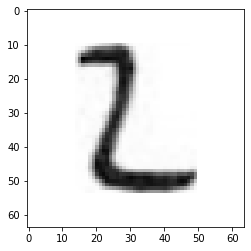

In [7]:
# Feed the respective digit image into the (ML based single digit) detector
# TODO

plt.imshow(singleDigitImageList[1], cmap="gray")